pipeline dos dados
grid_search para validar modelo
regularização
métricas
parâmetros modelos, vif, pairplot e shap-values
comparação entre previsão x real.
anaálise de resíduos
distribuiçao residuos
qq-plot, teste de normalidade.


In [123]:
import pandas as pd
import pickle
import sys
sys.path.append('..')
from src.train import montar_formula
from src.eda_preprocessing import vif_analise
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf


In [95]:
tbl_export = pd.read_csv('../data/processed/dataset_exportacao_regressor_processed.csv')

In [96]:
X = tbl_export.drop(columns='qtde_kg')
y = tbl_export['qtde_kg']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(3537, 26) (885, 26) (3537,) (885,)


In [98]:
dataset_treino = pd.concat([X_treino, y_treino], axis=1)
dataset_treino

,produto_texto_Espumantes,produto_texto_Suco de uva,produto_texto_Uvas frescas,produto_texto_Vinhos de mesa,pais_cat_cat_A,pais_cat_cat_B,pais_cat_cat_C,pais_cat_cat_D,pais_cat_outros,PIB_total_(dolar_corrente),...,importacao_abs,IDH_estimado,valor_dolar_ajustado,qtde_lag1,valor_ajustado_lag1,PIB_lag1,exportacao_abs_lag1,importacao_Abs_lag1,taxa_inflação_(CPI)_lag1,qtde_kg
4107,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-2.051151,...,-1.887807,-0.944908,-0.309434,0.333309,0.322658,-1.931884,-1.786005,-1.790596,-0.921057,-0.272868
564,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.499939,...,-0.279002,-0.944908,-1.051395,-0.481197,-0.528087,-0.418333,-0.299972,-0.242739,-0.892270,-0.983363
2979,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.257582,...,0.287171,-0.944908,-0.954803,-0.725283,-0.518749,0.300305,0.348470,0.337190,-0.345453,-1.037872
3897,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.620538,...,0.709161,-0.944908,1.729025,1.307500,1.406530,0.649866,0.752220,0.730849,-0.955551,1.605414
2170,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.655213,...,-0.384392,-0.944908,0.166863,0.269633,0.189871,-0.564647,-0.326734,-0.288913,1.425582,0.213386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.403723,...,-0.247579,-0.944908,-1.023409,-0.253126,-0.361150,-0.393822,-0.301107,-0.275299,0.929811,-0.961743
466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.657625,...,0.425694,1.145500,1.848456,2.051831,2.033563,0.683848,0.449741,0.475624,-0.921057,1.857314
3092,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.762694,...,0.991031,-0.944908,2.881016,2.776359,2.978616,0.779980,1.011823,0.982334,-0.192277,2.692103
3772,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.615787,...,-0.469946,0.478805,-0.899831,-1.764956,-1.811865,-0.505073,-0.497031,-0.364317,1.211418,-1.685685


In [99]:
lista = [ 
        'produto_texto_Espumantes', 'produto_texto_Suco de uva',
       'produto_texto_Uvas frescas', 'produto_texto_Vinhos de mesa',
       'pais_cat_cat_A',  
       'PIB_per_capita', 
       'importacao_abs', 'IDH_estimado', 'valor_dolar_ajustado', 'qtde_lag1',
        'taxa_inflação_(CPI)_lag1',]


In [100]:
# ols
funcao = montar_formula('qtde_kg',lista)
modelo = smf.ols(formula=funcao, data=dataset_treino).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           Q('qtde_kg')   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     9958.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        16:52:56   Log-Likelihood:                 949.68
No. Observations:                3537   AIC:                            -1877.
Df Residuals:                    3526   BIC:                            -1809.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [101]:
vif_analise(dataset_treino[lista])

,Feature,VIF
0,produto_texto_Espumantes,1.389084
1,produto_texto_Suco de uva,1.380725
2,produto_texto_Uvas frescas,1.469401
3,produto_texto_Vinhos de mesa,1.457509
4,pais_cat_cat_A,1.472677
5,PIB_per_capita,2.782086
6,importacao_abs,2.977940
7,IDH_estimado,1.159090
8,valor_dolar_ajustado,2.369186
9,qtde_lag1,2.329786


In [102]:
model = LinearRegression()
model.fit(X_treino[lista], y_treino)
y_pred = model.predict(X_teste[lista])
r2 = r2_score(y_teste, y_pred)
print(r2)
coeficientes = pd.Series(model.coef_, index=X_treino[lista].columns)
print(coeficientes)

0.9651829113896111
produto_texto_Espumantes       -0.110240
produto_texto_Suco de uva       0.085852
produto_texto_Uvas frescas      0.033153
produto_texto_Vinhos de mesa   -0.008764
pais_cat_cat_A                  0.034433
PIB_per_capita                 -0.034165
importacao_abs                 -0.002827
IDH_estimado                    0.030535
valor_dolar_ajustado            0.943519
qtde_lag1                       0.043207
taxa_inflação_(CPI)_lag1        0.013534
dtype: float64


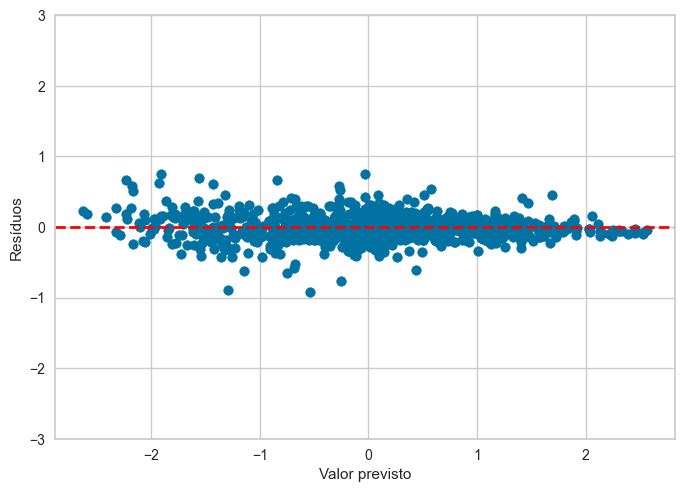

In [103]:
# análise dos resíduos
import matplotlib.pyplot as plt

res = y_teste - y_pred
plt.scatter(y_pred, res)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Valor previsto')
plt.ylabel('Resíduos')
plt.ylim(-3,3)
plt.show()

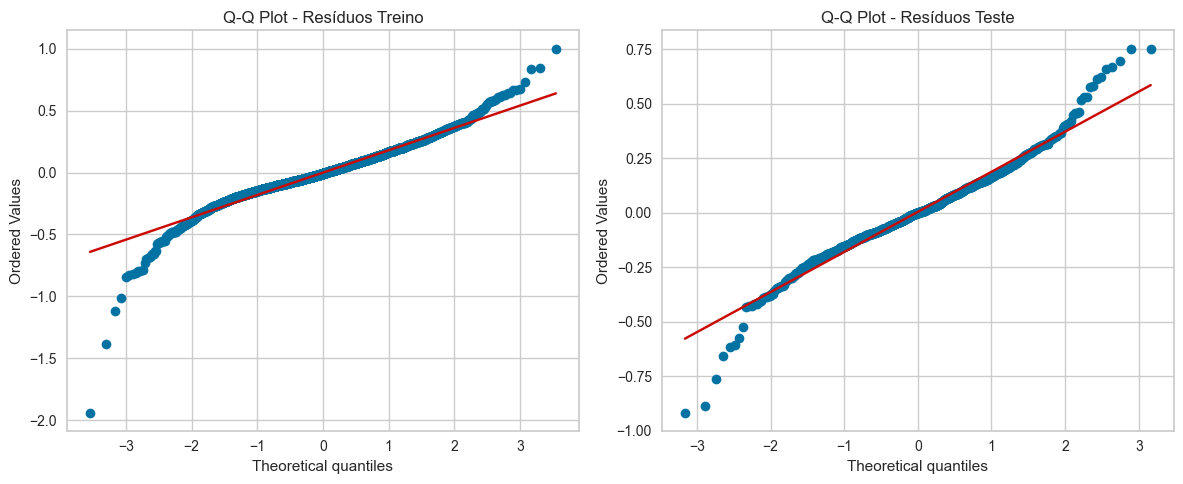

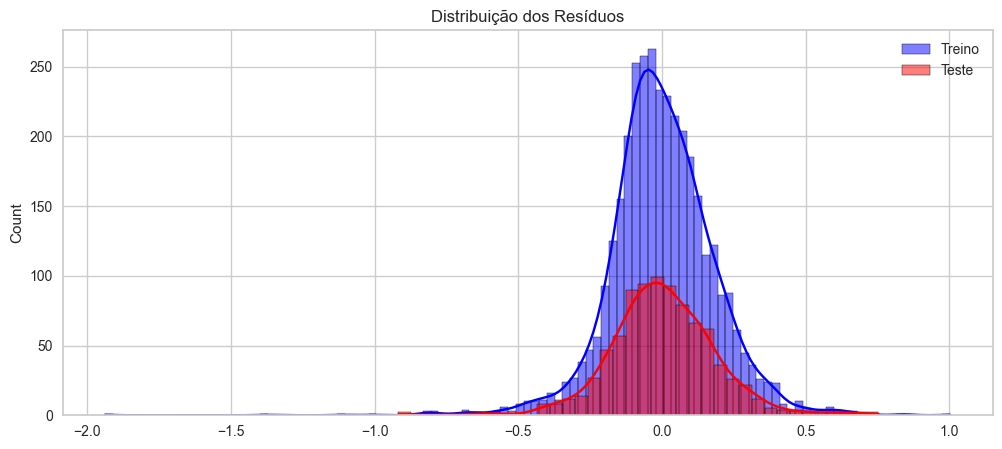

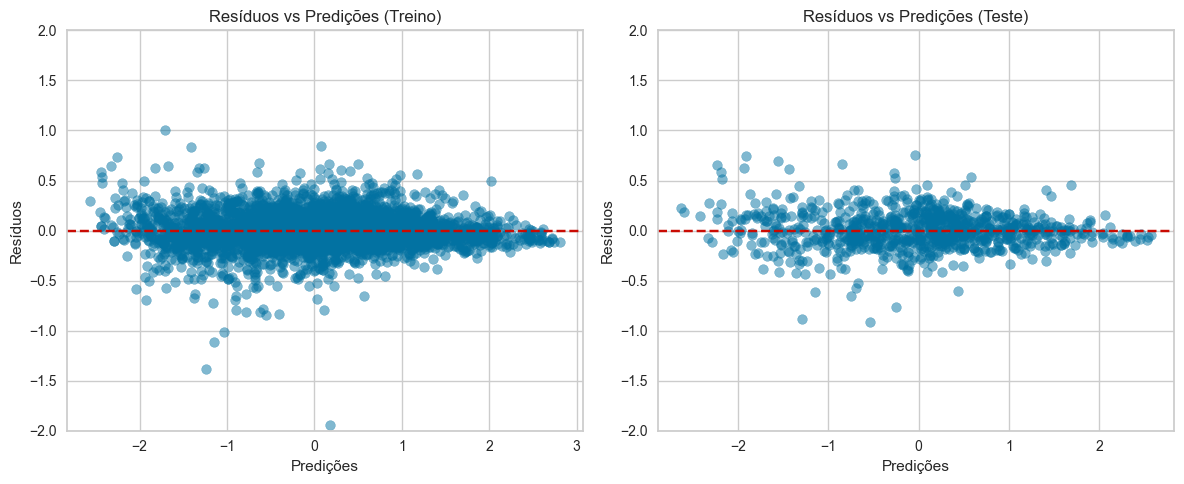

Shapiro-Wilk Test - Resíduos Treino:  ShapiroResult(statistic=np.float64(0.9529559388531923), pvalue=np.float64(2.6214576006612706e-32))
Shapiro-Wilk Test - Resíduos Teste:  ShapiroResult(statistic=np.float64(0.9697142603640828), pvalue=np.float64(1.335032022754676e-12))
R² Teste: 0.9652


In [104]:

y_train_pred = model.predict(X_treino[lista])
y_test_pred = model.predict(X_teste[lista])

# Resíduos:
residuals_train = np.ravel(y_treino - y_train_pred)
residuals_test = np.ravel(y_teste - y_test_pred)

# 1. QQ Plot - Normalidade dos resíduos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title('Q-Q Plot - Resíduos Treino')

plt.subplot(1, 2, 2)
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title('Q-Q Plot - Resíduos Teste')

plt.tight_layout()
plt.show()

# 2. Histograma dos resíduos
plt.figure(figsize=(12, 5))

sns.histplot(residuals_train, kde=True, color='blue', label='Treino')
sns.histplot(residuals_test, kde=True, color='red', label='Teste')
plt.title('Distribuição dos Resíduos')
plt.legend()

plt.show()

# 3. Resíduos vs Predições
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals_train, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Resíduos vs Predições (Treino)')
plt.ylim(-2,2)
plt.xlabel('Predições')
plt.ylabel('Resíduos')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred, residuals_test, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Resíduos vs Predições (Teste)')
plt.xlabel('Predições')
plt.ylim(-2,2)
plt.ylabel('Resíduos')

plt.tight_layout()
plt.show()

# 4. Shapiro-Wilk Test (normalidade)
from scipy.stats import shapiro

shapiro_train = shapiro(residuals_train)
shapiro_test = shapiro(residuals_test)

print("Shapiro-Wilk Test - Resíduos Treino: ", shapiro_train)
print("Shapiro-Wilk Test - Resíduos Teste: ", shapiro_test)

# 5. R²
r2 = r2_score(y_teste, y_test_pred)
print(f'R² Teste: {r2:.4f}')


In [107]:
plt.figure(figsize=(10,3))
plt.plot(teste.index[:150],teste['Quantidade (Kg)'][:150], label='Valor_Real')
plt.plot(pd.DataFrame(y_pred).index[:150],pd.DataFrame(y_pred)[:150], label='Valor_Previsto')


plt.xlabel('Index')
plt.ylabel('Quantidade (Kg)')
plt.legend()
plt.show()

NameError: name 'teste' is not defined

<Figure size 1000x300 with 0 Axes>

In [ ]:
kf = KFold(n_splits=5)

pipe = Pipeline([('model', LinearRegression())])

params=[{'model':[Ridge()], 'model__alpha': [0.1, 0.5, 1.0]},
        {'model':[Lasso()], 'model__alpha': [0.1, 0.5, 1.0]}
        ]

grid = GridSearchCV(pipe, param_grid=params, cv=kf)
grid.fit(X_treino[lista],y_treino)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('model', LinearRegression())]),
             param_grid=[{'model': [Ridge()], 'model__alpha': [0.1, 0.5, 1.0]},
                         {'model': [Lasso()], 'model__alpha': [0.1, 0.5, 1.0]}])

In [ ]:
y_pred = grid.predict(X_teste[lista])
r2 = r2_score(y_pred, y_teste)
r2

0.9648870402345331

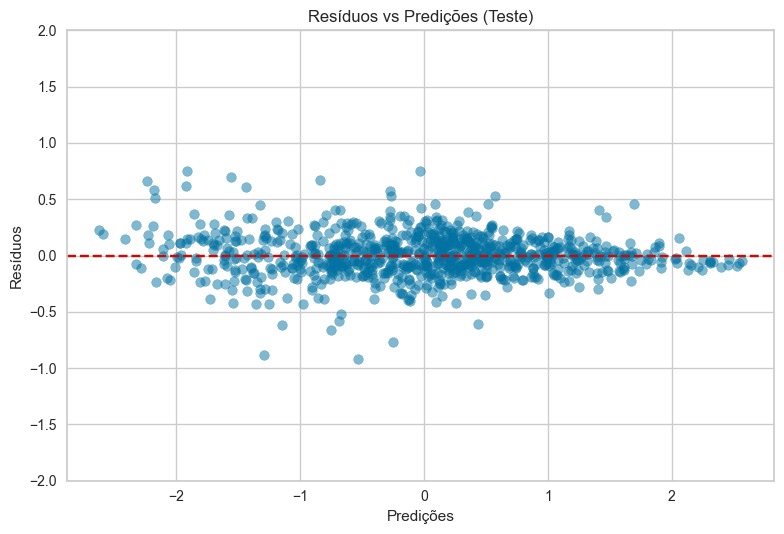

In [122]:

res = y_teste-y_pred
plt.scatter(y_pred, res, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title('Resíduos vs Predições (Teste)')
plt.xlabel('Predições')
plt.ylim(-2,2)
plt.ylabel('Resíduos')

plt.tight_layout()
plt.show()

# Salvando o Modelo

In [126]:
with open('../models/regressor_model.pkl', 'wb') as file:
    pickle.dump(grid.best_estimator_, file)